In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline
from scipy import optimize # Usefull to access the docs

from tyssue.core.sheet import Sheet



from tyssue.geometry.sheet_geometry import SheetGeometry as geom
from tyssue.dynamics.sheet_vertex_model import SheetModel as model

from tyssue.solvers.sheet_vertex_solver import Solver as solver
from tyssue.config.json_parser import load_default

from tyssue.dynamics.sheet_isotropic_model import isotropic_relax



from tyssue.draw.mpl_draw import sheet_view
import tyssue.draw.mpl_draw as draw
from tyssue.io import hdf5

multiple roots


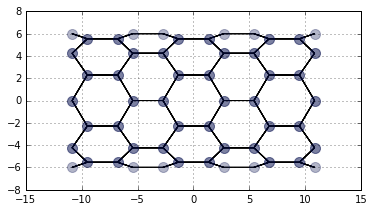

In [4]:
h5store = 'small_hexagonal.hf5'
datasets = hdf5.load_datasets(h5store, data_names=['face', 'jv', 'je'])
sheet = Sheet('emin', datasets)

sheet.set_geom('sheet')
geom.update_all(sheet)

nondim_specs = load_default('dynamics', 'sheet')
dim_model_specs = model.dimentionalize(nondim_specs)

sheet.set_model('sheet', dim_model_specs)
sheet.grad_norm_factor = sheet.specs['settings']['grad_norm_factor']
sheet.nrj_norm_factor = sheet.specs['settings']['nrj_norm_factor']

isotropic_relax(sheet, nondim_specs)

solver_settings = {
    'minimize': {
        'options': {'disp':True,
        'gtol':1e-4},
        'jac': solver.opt_grad
        }
    }



live_je = sheet.upcast_face(sheet.face_df.is_alive).astype(np.bool)
dead_je = np.logical_not(live_je)
inactive_jvs = set(sheet.je_df[dead_je].srce)

active_jvs = set(sheet.jv_df.index).difference(inactive_jvs)
active_jvs = list(active_jvs)
sheet.jv_df.is_active = 0
sheet.jv_df.loc[active_jvs, 'is_active'] = 1

fig, ax = sheet_view(sheet, ['z', 'x'])

In [5]:
sheet.Nf, sheet.Ne, sheet.Nv

(56, 272, 96)

True


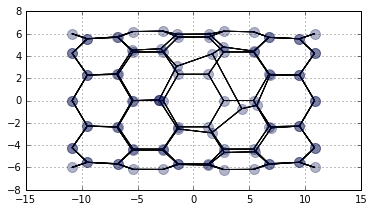

In [6]:
from tyssue.topology.sheet_topology import cell_division

cell_division(sheet, 17, geom)

res = solver.find_energy_min(sheet, geom, model)

print(res['success'])

fig, ax = sheet_view(sheet, ['z', 'x'])

In [7]:
sheet.Nf, sheet.Ne, sheet.Nv

(57, 278, 98)

In [7]:
cell_division(sheet, 23, geom, angle=0)

res = solver.find_energy_min(sheet, geom, model)
print(res['success'])

fig, ax = sheet_view(sheet, ['z', 'x'])

In [10]:
%pdb

Automatic pdb calling has been turned ON


True


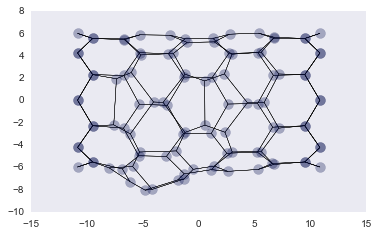

In [16]:
cell_division(sheet, 15, geom, angle=np.pi/2)

res = solver.find_energy_min(sheet, geom, model)
print(res['success'])

fig, ax = sheet_view(sheet, ['z', 'x'])

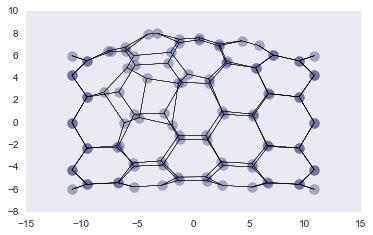

In [20]:
fig, ax = sheet_view(sheet, ['z', 'y'])

In [18]:
from tyssue.draw.vispy_draw import draw_tyssue

In [19]:

draw_tyssue(sheet)

/home/guillaume/anaconda/envs/tyssue/lib/python3.4/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
